# Thực hiện quá trình dự báo trên mô hình ARIMA

## Thêm thư viện

In [25]:
import pandas as pd
import warnings
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from pmdarima.arima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

warnings.filterwarnings('ignore')


## Nạp dữ liệu từ file csv

In [26]:
df = pd.read_csv("../Dataset/BTC-USD.csv", parse_dates=True,
                 index_col=0).drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])
df_index = df.index
df_close = df['Close'].values.reshape(-1, 1)
df.head()

,Close
Date,
2021-06-05,35551.957031
2021-06-06,35862.378906
2021-06-07,33560.707031
2021-06-08,33472.632812
2021-06-09,37345.121094


## Chuẩn hóa dữ liệu

In [27]:
arima_sc = StandardScaler()

df_scaled = df.copy()
df_scaled['Close'] = arima_sc.fit_transform(df_close)
df_scaled.head()

,Close
Date,
2021-06-05,-0.903048
2021-06-06,-0.868956
2021-06-07,-1.121731
2021-06-08,-1.131403
2021-06-09,-0.706119


# Vẽ đồ thị

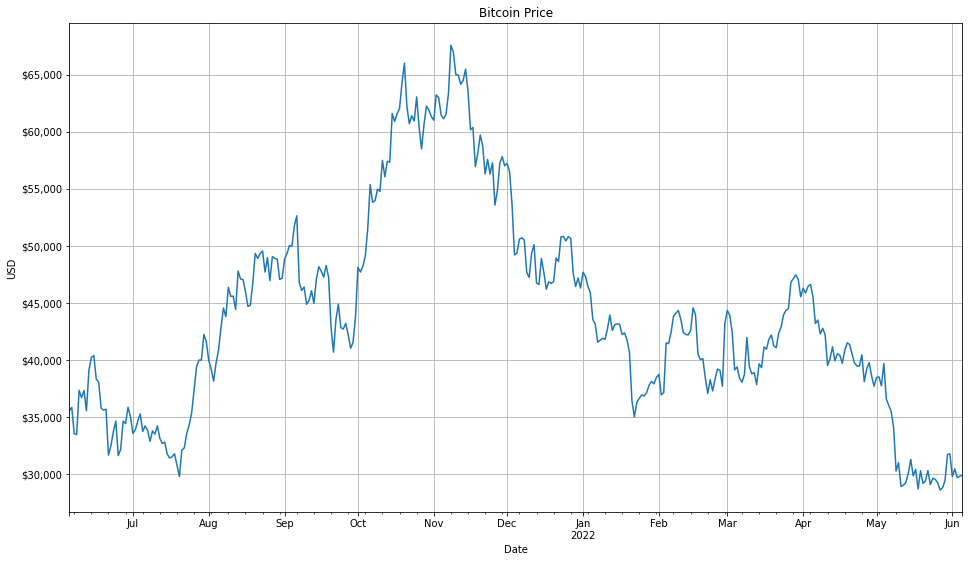

In [28]:
# Thư viện vẽ đồ thị
formatter = ticker.StrMethodFormatter('${x:,.0f}')

title = 'Bitcoin Price'
ylabel = 'USD'
xlabel = 'Date'

ax = df['Close'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)


# Tách dữ liệu thành tập train và test

In [29]:
train_data, test_data = df_scaled[df_scaled.index < '2022-01-01'], df_scaled[df_scaled.index >= '2022-01-01']
index_test = df_scaled.index[df_scaled.index >= '2022-01-01']
print(train_data.shape)
print(test_data.shape)


(210, 1)
(156, 1)


<h1>Xây dựng mô hình ARIMA để dự đoán giá Bitcoin theo chuỗi thời gian


In [30]:
warnings.filterwarnings('ignore')


def arima_model(ts_data):
    fit_model = auto_arima(ts_data, test='adf', seasonal=False, trace=True)
    return fit_model


In [31]:
fitted = arima_model(train_data)
fitted.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-113.056, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-107.763, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-105.808, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-105.827, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-109.569, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-105.718, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-106.628, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-111.551, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-111.567, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-104.308, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-104.083, Time=0.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-105.291, Time=0.20 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-109.303, Time=0.62 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-114.788, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(2, 1, 2)   Log Likelihood                  62.394
Date:                Tue, 07 Jun 2022   AIC                           -114.788
Time:                        16:00:16   BIC                            -98.076
Sample:                             0   HQIC                          -108.031
                                - 210                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3899      0.076      5.130      0.000       0.241       0.539
ar.L2         -0.9030      0.074    -12.242      0.000      -1.048      -0.758
ma.L1         -0.4070      0.115     -3.554      0.000      -0.631      -0.183
ma.L2          0.7968      0.097      8.220      0.000       0.607       0.987
sigma2         0.0322      0.003     11.387      0.000       0.027       0.038
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 6.45
Prob(Q):                              0.76   Prob(JB):                         0.04
Heteroskedasticity (H):               1.34   Skew:                            -0.28
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h1> Dự đoán trên tập test

In [32]:
pred = fitted.predict(len(test_data))
pred


array([0.23986684, 0.22514697, 0.25387277, 0.27836483, 0.26197331,
       0.23346546, 0.23715303, 0.26433432, 0.27160165, 0.24988936,
       0.2348616 , 0.24860958, 0.26754019, 0.26250588, 0.24344812,
       0.24056411, 0.25664952, 0.26552521, 0.25445993, 0.2421308 ,
       0.24731628, 0.26047162, 0.2609179 , 0.24921217, 0.24424537,
       0.25287962, 0.2607311 , 0.25599518, 0.24705859, 0.24785113,
       0.25623018, 0.25878128, 0.25220932, 0.24734334, 0.25138091,
       0.25734922, 0.25603005, 0.25012615, 0.24901561, 0.25391407,
       0.25682671, 0.25353881, 0.24962671, 0.25107057, 0.25516626,
       0.25545921, 0.25187488, 0.25021289, 0.25280169, 0.25531184,
       0.25395271, 0.25115607, 0.25129306, 0.25387194, 0.25475368,
       0.25276862, 0.25119846, 0.25237887, 0.25425699, 0.25392328,
       0.25209716, 0.25168655, 0.25317551, 0.25412682, 0.25315312,
       0.25191445, 0.25231079, 0.25358389, 0.25372232, 0.25262665,
       0.25207446, 0.2528486 , 0.25364907, 0.25326208, 0.25238

## Biến đổi giá trị dự đoán và thực tế về miền giá trị ban đầu

In [33]:
inv_test = arima_sc.inverse_transform(test_data.values.reshape(-1, 1))
inv_pred = arima_sc.inverse_transform(column_or_1d(pred).reshape(-1, 1))


# Vẽ đồ thị cho tập test và kết quả dự đoán


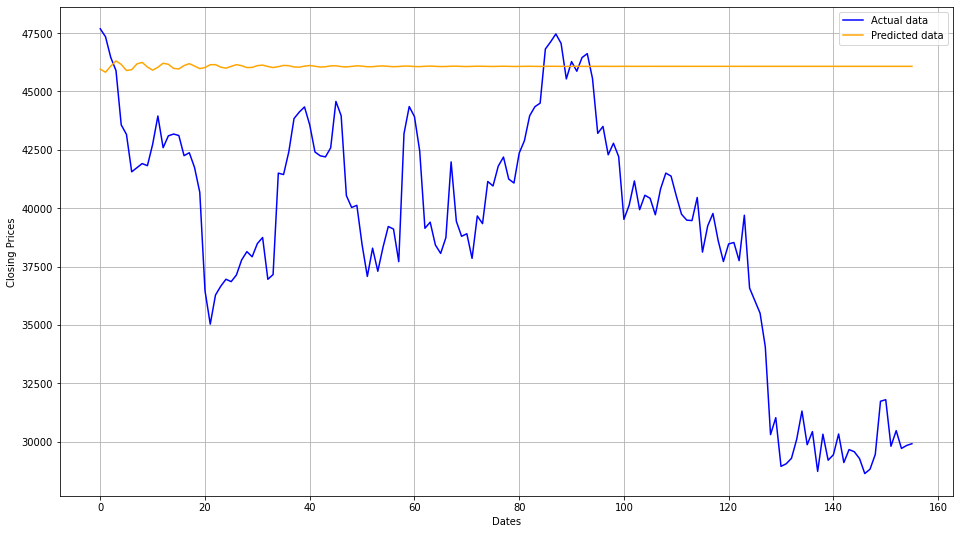

In [34]:
pred_series = pd.Series(pred, index=index_test)

plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(inv_test, 'blue', label='Actual data')
plt.plot(inv_pred, 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [35]:
mae = mean_absolute_error(inv_test, inv_pred)
mape = mean_absolute_percentage_error(inv_test, inv_pred)
mse = mean_squared_error(inv_test, inv_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 7135.87
MAPE: 20.52%
MSE: 75458671.81
RMSE: 8686.70


# Tạo một DataFrame là 'df_pred' để lưu kết quả dự đoán trên mô hình ARIMA

In [36]:
df_pred = pd.DataFrame(index=index_test)
df_pred['actual'] = inv_test
df_pred['arima'] = inv_pred
df_pred['error'] = inv_test - inv_pred
df_pred

,actual,arima,error
Date,,,
2022-01-01,47686.812500,45958.924555,1727.887945
2022-01-02,47345.218750,45824.890734,1520.328016
2022-01-03,46458.117188,46086.457482,371.659705
2022-01-04,45897.574219,46309.473388,-411.899169
2022-01-05,43569.003906,46160.218117,-2591.214211
...,...,...,...
2022-06-01,29799.080078,46077.839380,-16278.759302
2022-06-02,30467.488281,46077.689559,-15610.201278
2022-06-03,29704.390625,46077.633531,-16373.242906


# Tạo thêm một DataFrame để tiến hành dự đoán sai số trên mô hình SVR

In [37]:
df_svr = df_pred.copy()
df_svr = df_svr.drop(columns=['actual', 'arima'])
timestamp = pd.to_datetime(df_svr.index).astype(np.int64) / 10**9
df_svr['timestamp'] = timestamp
df_svr.tail()

,error,timestamp
Date,,
2022-06-01,-16278.759302,1.654042e+09
2022-06-02,-15610.201278,1.654128e+09
2022-06-03,-16373.242906,1.654214e+09
2022-06-04,-16244.832918,1.654301e+09
2022-06-05,-16171.179697,1.654387e+09


In [38]:
svr_x_sc = StandardScaler()
svr_y_sc = StandardScaler()

x = df_svr.iloc[:, -1].values
y = df_svr.iloc[:, 0].values

x_scaled = svr_x_sc.fit_transform(x.reshape(-1, 1))
y_scaled = svr_y_sc.fit_transform(y.reshape(-1, 1))

print(x_scaled.shape)
print(y_scaled.shape)

(156, 1)
(156, 1)


<h1>Vẽ đồ thị thể hiện sai số

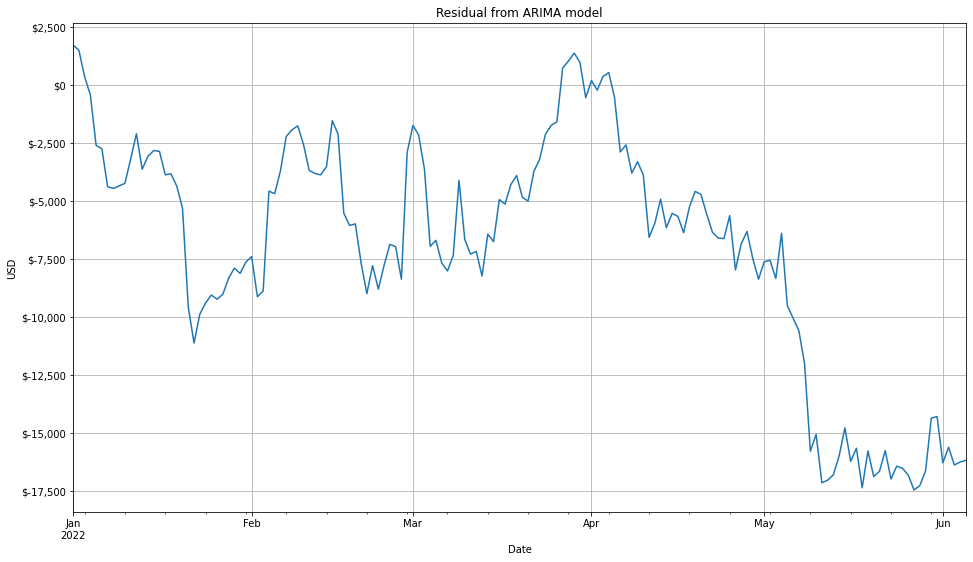

In [39]:
formatter = ticker.StrMethodFormatter('${x:,.0f}')

title = 'Residual from ARIMA model'
ylabel = 'USD'
xlabel = 'Date'

ax = df_svr['error'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)


## Hàm tạo hyperparameters

In [40]:
def para_range(minimum, maximum, step):
    para_list = np.arange(minimum, maximum, step)
    return para_list


def print_stats(hyperparams, stats):
    if(hyperparams[0] == 'poly'):
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}, degree={hyperparams[3]}')
    else:
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}')

    print(
        f"MAE={stats[0]:.2f} | MSE={stats[1] :.2f} | RMSE={stats[2]:.2f}")


In [41]:
kernels = ['sigmoid', 'rbf', 'poly']
Cs = para_range(0.01, 0.2, 0.1)
gammas = para_range(0.1, 5, 0.1)
degrees = para_range(1, 6, 1)


## GridSearch để tìm hyperparameters phù hợp

In [42]:
warnings.filterwarnings('ignore')

stats_df = pd.DataFrame(
    columns=['kernel', 'C', 'gamma', 'degree', 'MAE', 'MSE', 'RMSE'])

# Sử dụng gird-seach để tìm hyperparameters phù hợp
for ker in kernels:
    # Nếu kernel == poly thì thực hiện chọn degree
    if(ker != 'poly'):
        for C in Cs:
            for gamma in gammas:
                rgs = SVR(kernel=ker, C=C, gamma=gamma, verbose=False)
                rgs.fit(x_scaled, y_scaled)
                pred = rgs.predict(x_scaled)

                # Đảo tỷ lệ thành giá trị thực
                inv_pred = svr_y_sc.inverse_transform(
                    column_or_1d(pred).reshape(-1, 1))
                inv_y = svr_y_sc.inverse_transform(
                    column_or_1d(y_scaled).reshape(-1, 1))

                # Đánh giá mô hình
                mae = mean_absolute_error(inv_y, inv_pred)
                mse = mean_squared_error(inv_y, inv_pred)
                rmse = np.sqrt(mse)

                result = {'kernel': ker, 'C': C, 'gamma': gamma,
                          'degree': 0, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}

                hyperparam = [ker, C, gamma, 0]
                stats = [mae, mse, rmse]
                stats_df = stats_df.append(result, ignore_index=True)
                print_stats(hyperparam, stats)
    else:
        for C in Cs:
            for gamma in gammas:
                for deg in degrees:
                    rgs = SVR(kernel=ker, C=C, gamma=gamma,
                              degree=deg, verbose=False)
                    rgs.fit(x_scaled, y_scaled)
                    pred = rgs.predict(x_scaled)

                    # Đảo tỷ lệ thành giá trị thực
                    inv_pred = svr_y_sc.inverse_transform(
                        column_or_1d(pred).reshape(-1, 1))
                    inv_y = svr_y_sc.inverse_transform(
                        column_or_1d(y_scaled).reshape(-1, 1))

                    # Đánh giá mô hình
                    mae = mean_absolute_error(inv_y, inv_pred)
                    mse = mean_squared_error(inv_y, inv_pred)
                    rmse = np.sqrt(mse)

                    hyperparam = [ker, C, gamma, deg]
                    stats = [mae, mse, rmse]
                    result = {'kernel': ker, 'C': C, 'gamma': gamma, 'degree': deg,
                              'MAE': mae, 'MSE': mse, 'RMSE': rmse}

                    stats_df = stats_df.append(result, ignore_index=True)

                    print_stats(hyperparam, stats)


SVR(kernel=sigmoid, C=0.01, gamma=0.1
MAE=3835.84 | MSE=25361232.88 | RMSE=5035.99
SVR(kernel=sigmoid, C=0.01, gamma=0.2
MAE=3739.84 | MSE=24120244.57 | RMSE=4911.24
SVR(kernel=sigmoid, C=0.01, gamma=0.30000000000000004
MAE=3684.07 | MSE=23048491.81 | RMSE=4800.88
SVR(kernel=sigmoid, C=0.01, gamma=0.4
MAE=3669.51 | MSE=22674700.00 | RMSE=4761.80
SVR(kernel=sigmoid, C=0.01, gamma=0.5
MAE=3682.46 | MSE=22798511.19 | RMSE=4774.78
SVR(kernel=sigmoid, C=0.01, gamma=0.6
MAE=3699.22 | MSE=22980709.79 | RMSE=4793.82
SVR(kernel=sigmoid, C=0.01, gamma=0.7000000000000001
MAE=3713.99 | MSE=23066503.86 | RMSE=4802.76
SVR(kernel=sigmoid, C=0.01, gamma=0.8
MAE=3737.07 | MSE=23423418.35 | RMSE=4839.77
SVR(kernel=sigmoid, C=0.01, gamma=0.9
MAE=3763.53 | MSE=23773496.67 | RMSE=4875.81
SVR(kernel=sigmoid, C=0.01, gamma=1.0
MAE=3782.68 | MSE=24001604.50 | RMSE=4899.14
SVR(kernel=sigmoid, C=0.01, gamma=1.1
MAE=3801.98 | MSE=24220557.78 | RMSE=4921.44
SVR(kernel=sigmoid, C=0.01, gamma=1.2000000000000002
MAE

In [43]:
best_fit_model = stats_df[stats_df['RMSE'] == stats_df['RMSE'].min()].head(1)
best_fit_model


,kernel,C,gamma,degree,MAE,MSE,RMSE
195,rbf,0.11,4.9,0,1673.124075,4554699.270894,2134.174143


# Xây dựng mô hình SVR với các tham số vừa tìm được

In [44]:
kernel = str(best_fit_model['kernel'].values[0])
C = float(best_fit_model['C'])
gamma = float(best_fit_model['gamma'])
degree = int(best_fit_model['degree'])

if(kernel == 'poly'):
    rgs = SVR(kernel=kernel, C=C, gamma=gamma, degree=degree)
else:
    rgs = SVR(kernel=kernel, C=C, gamma=gamma)

rgs.fit(x_scaled, y_scaled)
pred = rgs.predict(x_scaled)
pred

array([ 6.69018028e-01,  6.79324326e-01,  6.85430104e-01,  6.87120116e-01,
        6.84244311e-01,  6.76725334e-01,  6.64564745e-01,  6.47847676e-01,
        6.26745654e-01,  6.01517374e-01,  5.72507225e-01,  5.40141472e-01,
        5.04922018e-01,  4.67417794e-01,  4.28253880e-01,  3.88098549e-01,
        3.47648527e-01,  3.07612820e-01,  2.68695550e-01,  2.31578281e-01,
        1.96902388e-01,  1.65252018e-01,  1.37138207e-01,  1.12984719e-01,
        9.31160855e-02,  7.77483229e-02,  6.69826646e-02,  6.08025909e-02,
        5.90743006e-02,  6.15506597e-02,  6.78785360e-02,  7.76093046e-02,
        9.02121978e-02,  1.05090068e-01,  1.21597051e-01,  1.39057543e-01,
        1.56785885e-01,  1.74106106e-01,  1.90371102e-01,  2.04980672e-01,
        2.17397860e-01,  2.27163150e-01,  2.33906157e-01,  2.37354529e-01,
        2.37339910e-01,  2.33800907e-01,  2.26783105e-01,  2.16436268e-01,
        2.03008947e-01,  1.86840776e-01,  1.68352777e-01,  1.48036055e-01,
        1.26439225e-01,  

# Vẽ đồ thị

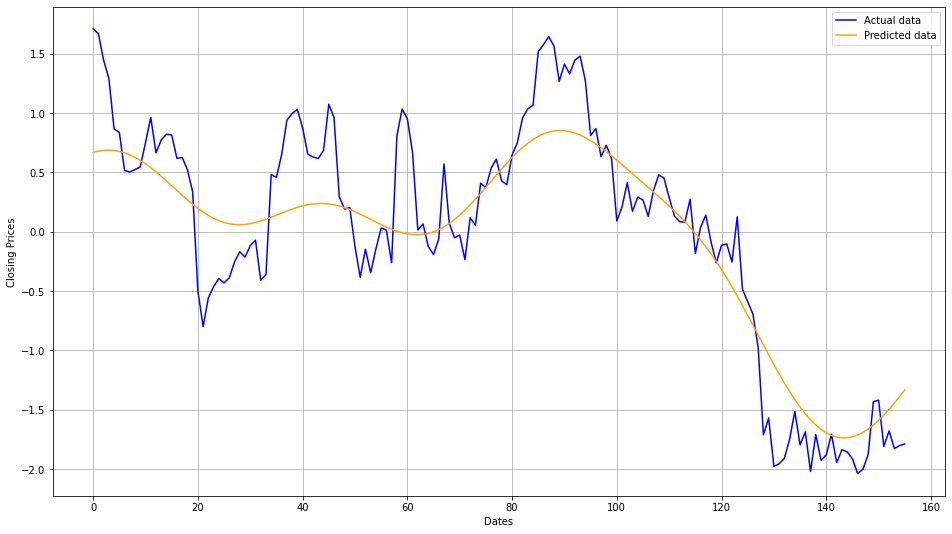

In [45]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(column_or_1d(y_scaled), 'blue', label='Actual data')
plt.plot(column_or_1d(pred), 'orange', label='Predicted data')
plt.legend()


# Đưa giá trị về miền giá trị ban đầu

In [46]:
inv_pred = svr_y_sc.inverse_transform(column_or_1d(pred).reshape(-1, 1))

df_pred['error_svr'] = inv_pred
df_pred['arima_svr'] = df_pred['arima'] + df_pred['error_svr']
df_pred

,actual,arima,error,error_svr,arima_svr
Date,,,,,
2022-01-01,47686.812500,45958.924555,1727.887945,-3600.132490,42358.792065
2022-01-02,47345.218750,45824.890734,1520.328016,-3547.423805,42277.466929
2022-01-03,46458.117188,46086.457482,371.659705,-3516.197501,42570.259982
2022-01-04,45897.574219,46309.473388,-411.899169,-3507.554406,42801.918982
2022-01-05,43569.003906,46160.218117,-2591.214211,-3522.261910,42637.956207
...,...,...,...,...,...
2022-06-01,29799.080078,46077.839380,-16278.759302,-14931.981704,31145.857676
2022-06-02,30467.488281,46077.689559,-15610.201278,-14684.231252,31393.458307
2022-06-03,29704.390625,46077.633531,-16373.242906,-14417.508795,31660.124736


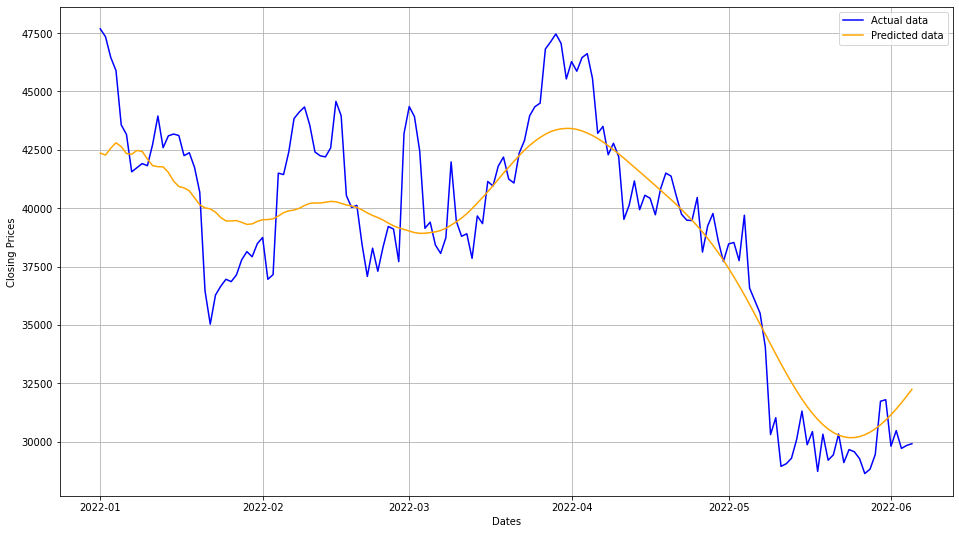

In [47]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_pred['actual'], 'blue', label='Actual data')
plt.plot(df_pred['arima_svr'], 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [48]:
mae = mean_absolute_error(df_pred['actual'].values, df_pred['arima_svr'].values)
mape = mean_absolute_percentage_error(df_pred['actual'].values, df_pred['arima_svr'].values)
mse = mean_squared_error(df_pred['actual'].values, df_pred['arima_svr'].values)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 1673.12
MAPE: 4.29%
MSE: 4554699.27
RMSE: 2134.17
